# Support Vector Machine Classifier (SVM)

## Importing libraries

In [3]:
import seaborn as sna
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  train_test_split
from sklearn import svm, datasets
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV

In [4]:
mushroom_data = pd.read_csv('mushrooms-full-dataset.csv', dtype=str)
mushroom_data.head()


,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
mushroom_data['poisonous'].value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

# Checking Null values

In [6]:
mushroom_data.isna().sum()

poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Spliting the data into target and input

In [7]:
target = mushroom_data['poisonous']
input = mushroom_data.drop(['poisonous'], axis =1)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(input,target,test_size=0.2,random_state=365,stratify=target)

# Checking the result after Stratification
Stratify means to equally distribute the variable even after the split

In [9]:
y_train.value_counts()

e    3366
p    3133
Name: poisonous, dtype: int64

In [10]:
y_test.value_counts()

e    842
p    783
Name: poisonous, dtype: int64

# Converting Categorical data into numerical data
**LabelEncoder** preserves our target labels.\
**OrdinalEncoder** Categorical data into numerical data.

In [11]:
enc_i = OrdinalEncoder()
enc_t = LabelEncoder()

In [12]:
x_train_transf = enc_i.fit_transform(x_train)
x_test_transf = enc_i.transform(x_test)

y_train_transf = enc_t.fit_transform(y_train)
y_test_transf = enc_t.fit_transform(y_test)

# Checking the values after encoding

In [13]:
y_train_transf

array([0, 0, 0, ..., 1, 0, 0])

In [14]:
x_test_transf.dtype

dtype('float64')

# Rescaling (important for SVM only)
It is import to rescale our feature/input into the range of (-1,1). This is done so that the algorithms can function properly

In [15]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train_transf)
x_train_rescaled = scaling.transform(x_train_transf)

# Classification

In [16]:
C = 1.0
svc = svm.SVC(kernel='linear', C = C).fit(x_train_rescaled, y_train_transf)

In [17]:
y_pred_test = svc.predict(scaling.transform(x_test_transf))

In [18]:
y_pred_test

array([1, 1, 1, ..., 1, 1, 0])

# Model Evaluation

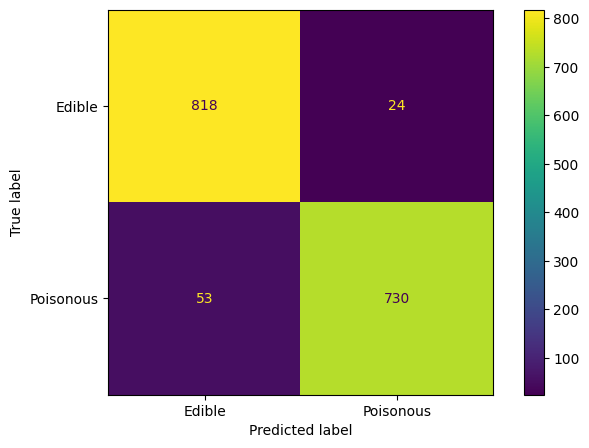

In [19]:
fig, ax = plt.subplots(figsize=(8,5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_transf,y_pred_test),
    display_labels=['Edible','Poisonous']
)
cmp.plot(ax=ax)

In [20]:
print(classification_report(y_test_transf,y_pred_test, target_names=['Edible','Poisonous']))

              precision    recall  f1-score   support

      Edible       0.94      0.97      0.96       842
   Poisonous       0.97      0.93      0.95       783

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



# Hyper Parameter Tuning using GridSearchCV

In [21]:
parameter_tuned = [
    {"kernel": ["linear"], 'C':[1,10]},
    {'kernel': ['poly'], 'C': [1,10]},
    {'kernel': ['rbf'], 'gamma': [1e-3,1e-4],'C':[1,10]}
]

In [26]:
def tuned(result):

  means = result['mean_test_score']
  stds = result['std_test_score']
  best_params = result['params'][means.argmax()]

  print('Best Params {}\n'.format(best_params))
  print('Mean test score: {}\n'.format(round(means.mean(),3)))
  print('Std test score: {}'.format(round(stds.mean(),3)))

  for mean, std, params in zip(means,stds,result['params']):
    print('{} (x/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

gcv = GridSearchCV(svm.SVC(), parameter_tuned)
gcv.fit(x_train_rescaled,y_train_transf)
print(tuned(gcv.cv_results_))

Best Params {'C': 1, 'kernel': 'poly'}

Mean test score: 0.949

Std test score: 0.003
0.952 (x/-0.013) for {'C': 1, 'kernel': 'linear'}
0.954 (x/-0.009) for {'C': 10, 'kernel': 'linear'}
1.0 (x/-0.0) for {'C': 1, 'kernel': 'poly'}
1.0 (x/-0.0) for {'C': 10, 'kernel': 'poly'}
0.925 (x/-0.004) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.886 (x/-0.016) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.948 (x/-0.008) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.925 (x/-0.004) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
None


In [27]:
C = 1.0
svc = svm.SVC(kernel='poly', C = C).fit(x_train_rescaled, y_train_transf)

In [31]:
y_true, y_pred = y_test_transf, gcv.predict(scaling.transform(x_test_transf))

In [32]:
print(classification_report(y_true,y_pred, target_names=['Edible','Poisonous']))

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       842
   Poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

